In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
csv_path = "goods_transportation_festive_migration_data.csv"
data = pd.read_csv(csv_path)
data

,Date,Road Transport (tons),Rail Transport (tons),Air Transport (tons),Sea Transport (tons),Festive Sales Impact,Migration Season Impact
0,2024-01-01,1134,1198,462,5877,New Year Sales,Regular
1,2024-01-02,1074,1091,462,6125,Regular,Regular
2,2024-01-03,1438,1110,229,6576,Regular,Regular
3,2024-01-04,1675,901,394,5609,Regular,Regular
4,2024-01-05,1430,913,471,5091,Regular,Regular
...,...,...,...,...,...,...,...
360,2024-12-26,1890,1144,410,6488,Regular,Regular
361,2024-12-27,1496,1001,446,5947,Regular,Regular
362,2024-12-28,1232,1147,296,6880,Regular,Regular
363,2024-12-29,1503,1032,265,6793,Regular,Regular


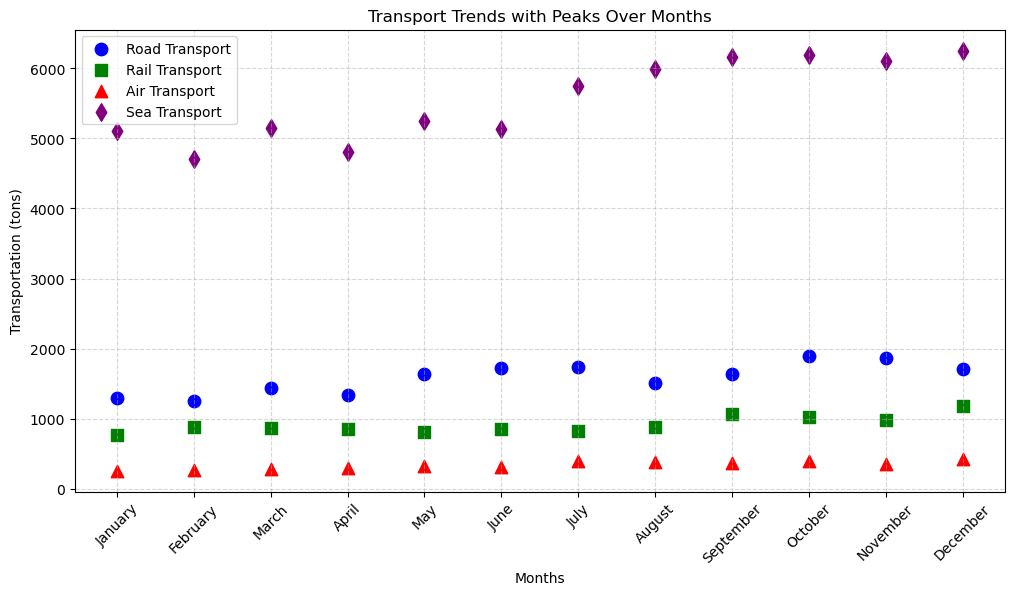

ADF Test Results After Differencing:
Road Transport (tons): ADF Statistic = -5.5989, p-value = 0.0000, Stationary: True
Rail Transport (tons): ADF Statistic = -3.5926, p-value = 0.0059, Stationary: True
Air Transport (tons): ADF Statistic = -6.3246, p-value = 0.0000, Stationary: True
Sea Transport (tons): ADF Statistic = 1.0000, p-value = 0.9943, Stationary: False
Second-Order Differencing ADF Test for Sea Transport:
ADF Statistic: nan
p-value: nan
Critical Values: {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}
Stationary: False
Log Transformation + Differencing ADF Test for Sea Transport:
ADF Statistic: -2.8831
p-value: 0.0474
Critical Values: {'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733}
Stationary: True


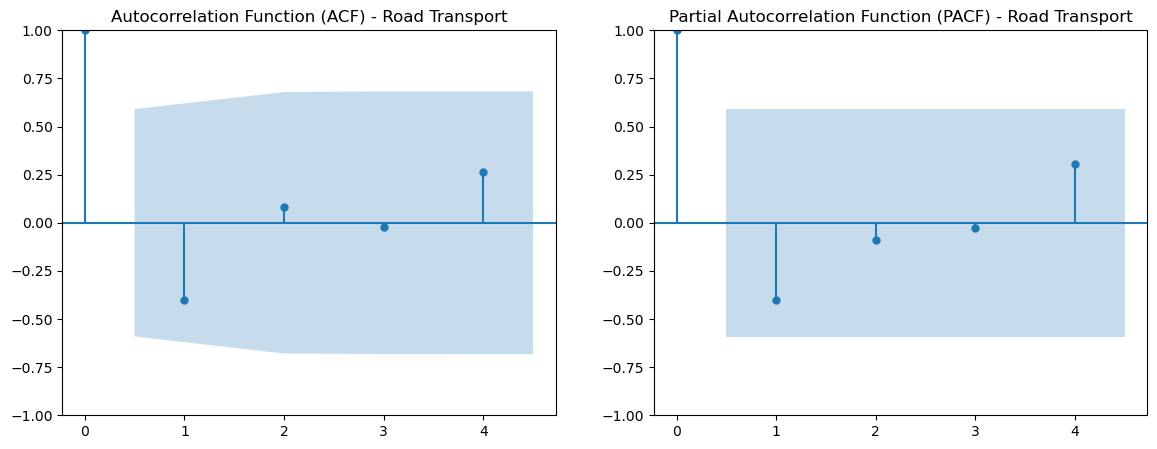

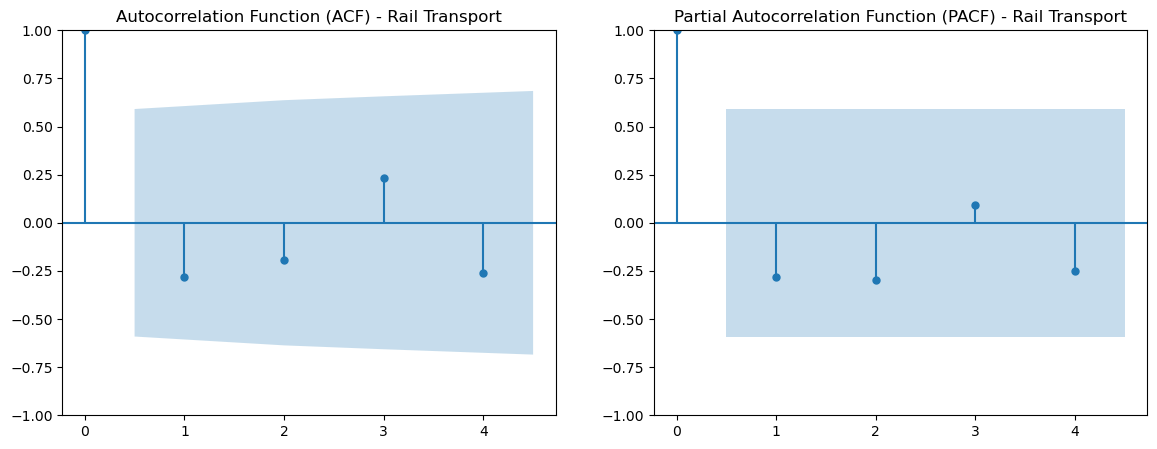

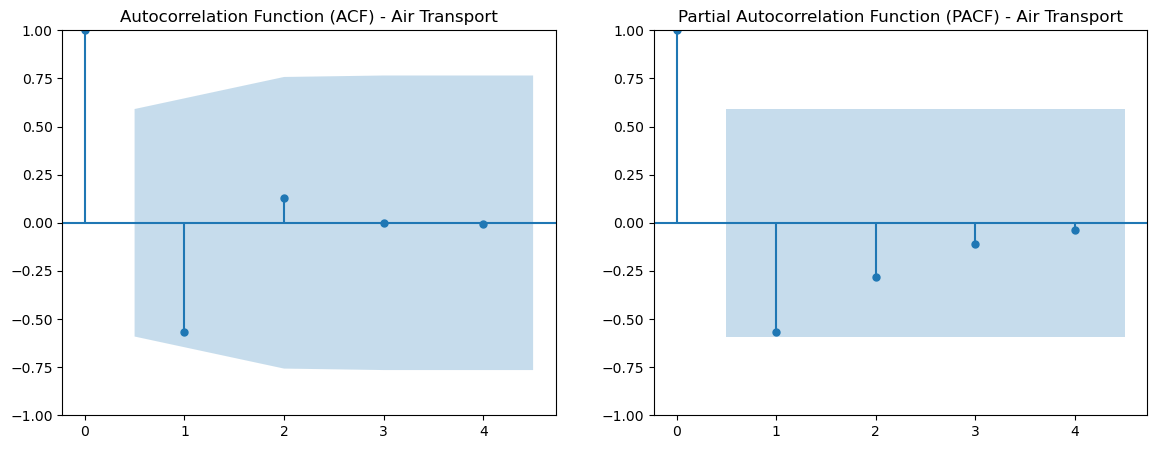

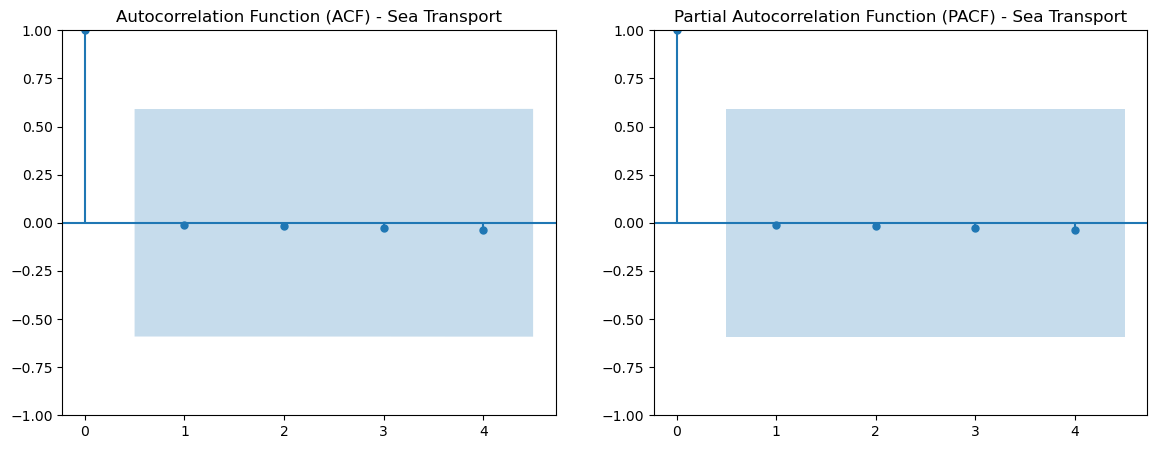

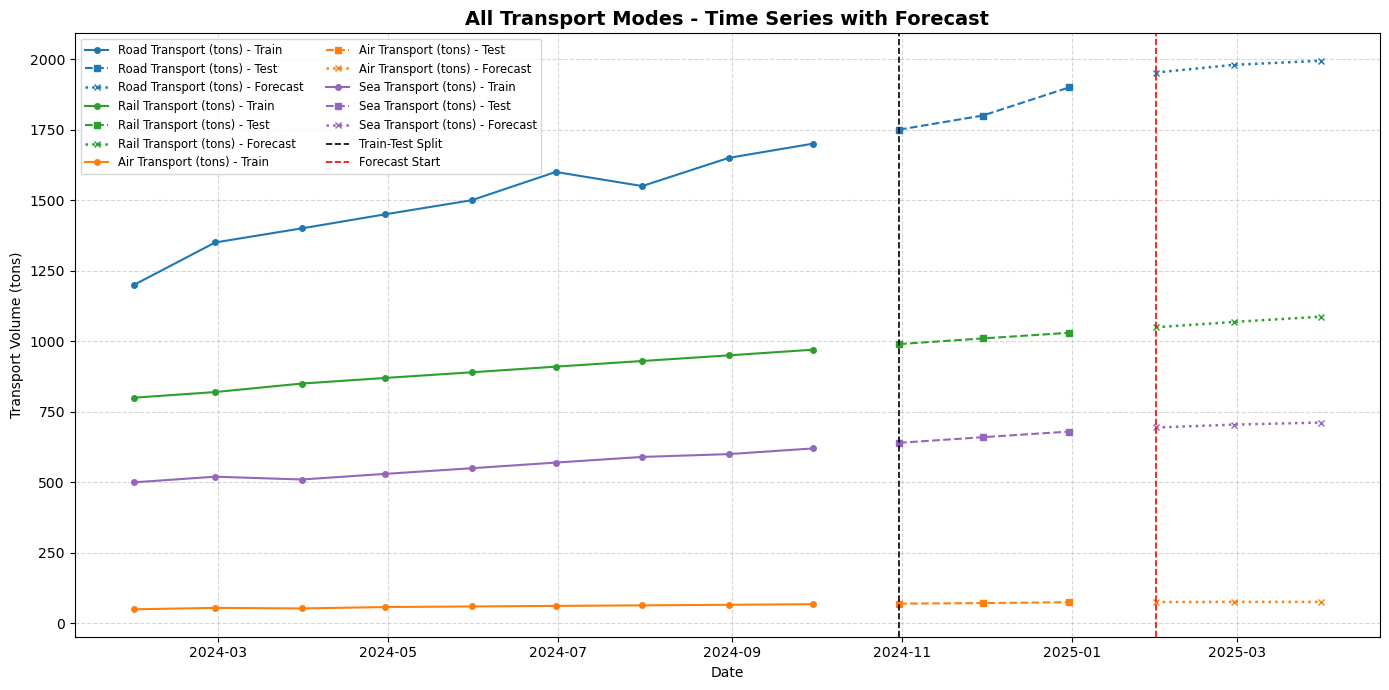

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

csv_path = "goods_transportation_festive_migration_data.csv"
df = pd.read_csv(csv_path)
months = np.arange(len(df["Month"]))  
month_labels = df["Month"]

road_transport = df["Road Transport (tons)"] + np.random.randint(-200, 200, size=len(df))
rail_transport = df["Rail Transport (tons)"] + np.random.randint(-150, 150, size=len(df))
air_transport = df["Air Transport (tons)"] + np.random.randint(-50, 50, size=len(df))
sea_transport = df["Sea Transport (tons)"] + np.random.randint(-500, 500, size=len(df))

plt.figure(figsize=(12, 6))
plt.scatter(months, road_transport, label="Road Transport", color='blue', marker='o', s=80)
plt.scatter(months, rail_transport, label="Rail Transport", color='green', marker='s', s=80)
plt.scatter(months, air_transport, label="Air Transport", color='red', marker='^', s=80)
plt.scatter(months, sea_transport, label="Sea Transport", color='purple', marker='d', s=80)

plt.xticks(months, month_labels, rotation=45) 
plt.xlabel("Months")
plt.ylabel("Transportation (tons)")
plt.title("Transport Trends with Peaks Over Months")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

numerical_columns = df.select_dtypes(include=['number']).columns
#first-order differencing
df_diff = df[numerical_columns].diff().dropna()
adf_results_after_diff = {}
for column in df_diff.columns:
    result = adfuller(df_diff[column])
    adf_results_after_diff[column] = {
        "ADF Statistic": result[0],
        "p-value": result[1],
        "Critical Values": result[4],
        "Stationary": result[1] < 0.05 
    }


print("ADF Test Results After Differencing:")
for key, value in adf_results_after_diff.items():
    print(f"{key}: ADF Statistic = {value['ADF Statistic']:.4f}, p-value = {value['p-value']:.4f}, Stationary: {value['Stationary']}")

# second-order differencing
df_diff["Sea Transport (tons)"] = df_diff["Sea Transport (tons)"].diff().dropna()

result = adfuller(df_diff["Sea Transport (tons)"].dropna())

print(f"Second-Order Differencing ADF Test for Sea Transport:")
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
print(f"Critical Values: {result[4]}")
print(f"Stationary: {result[1] < 0.05}")

#logarithm tarnformation 
df["Sea Transport (tons)"] = np.log(df["Sea Transport (tons)"] + 1) 


df_diff["Sea Transport (tons)"] = df["Sea Transport (tons)"].diff().dropna()


result = adfuller(df_diff["Sea Transport (tons)"].dropna())


print(f"Log Transformation + Differencing ADF Test for Sea Transport:")
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
print(f"Critical Values: {result[4]}")
print(f"Stationary: {result[1] < 0.05}")

csv_path = "goods_transportation_festive_migration_data.csv"
df = pd.read_csv(csv_path)

# Optional: Convert 'Month' to datetime and set as index if it's not already
df['Month'] = pd.to_datetime("2024-" + df['Month'], format="%Y-%B")
df.set_index('Month', inplace=True)

# Optional: Sort by date just in case
df = df.sort_index()

# Differencing to make the series stationary
road_diff = df["Road Transport (tons)"].diff().dropna()
rail_diff = df["Rail Transport (tons)"].diff().dropna()
air_diff = df["Air Transport (tons)"].diff().dropna()
sea_diff = df["Sea Transport (tons)"].diff().dropna()


def plot_acf_pacf(series, title):
    n_obs = len(series)  
    max_lag = min(4, n_obs // 2 - 1) 

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    plot_acf(series, ax=axes[0], lags=max_lag)
    axes[0].set_title(f'Autocorrelation Function (ACF) - {title}')

    if max_lag > 0:
        plot_pacf(series, ax=axes[1], lags=max_lag, method='ywm')
        axes[1].set_title(f'Partial Autocorrelation Function (PACF) - {title}')

    plt.show()


plot_acf_pacf(road_diff, "Road Transport")
plot_acf_pacf(rail_diff, "Rail Transport")
plot_acf_pacf(air_diff, "Air Transport")
plot_acf_pacf(sea_diff, "Sea Transport")

df = pd.DataFrame(data, index=pd.date_range(start="2024-01-01", periods=len(data["Road Transport (tons)"]), freq="M"))

train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


def forecast_arima(series, steps=2):
    model = ARIMA(series, order=(1,1,0)) 
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)  
    return forecast

# Forecast for each transport type
future_dates = pd.date_range(start="2025-01-01", end="2025-03-31", freq="M")
steps = len(future_dates)

road_forecast = forecast_arima(df["Road Transport (tons)"], steps=steps)
rail_forecast = forecast_arima(df["Rail Transport (tons)"], steps=steps)
air_forecast = forecast_arima(df["Air Transport (tons)"], steps=steps)
sea_forecast = forecast_arima(df["Sea Transport (tons)"], steps=steps)

forecast_df = pd.DataFrame({
    "Road Transport (tons)": road_forecast,
    "Rail Transport (tons)": rail_forecast,
    "Air Transport (tons)": air_forecast,
    "Sea Transport (tons)": sea_forecast
}, index=future_dates)

# Function to plot all transport modes in one graph
def plot_all_transports_with_forecast(train, test, forecast, title="All Transport Modes"):
    plt.figure(figsize=(14, 7))

    transport_modes = {
        "Road Transport (tons)": "tab:blue",
        "Rail Transport (tons)": "tab:green",
        "Air Transport (tons)": "tab:orange",
        "Sea Transport (tons)": "tab:purple"
    }

    for mode, color in transport_modes.items():
        # Plot training data
        plt.plot(train.index, train[mode], label=f"{mode} - Train", linestyle="-", marker="o",
                 markersize=4, linewidth=1.5, color=color)
        # Plot testing data
        plt.plot(test.index, test[mode], label=f"{mode} - Test", linestyle="--", marker="s",
                 markersize=4, linewidth=1.5, color=color)
        # Plot forecast data
        plt.plot(forecast.index, forecast[mode], label=f"{mode} - Forecast", linestyle=":", marker="x",
                 markersize=5, linewidth=1.8, color=color)

 
    plt.axvline(test.index[0], color='black', linestyle='dashed', linewidth=1.2, label="Train-Test Split")
    plt.axvline(forecast.index[0], color='red', linestyle='dashed', linewidth=1.2, label="Forecast Start")

    plt.xlabel("Date")
    plt.ylabel("Transport Volume (tons)")
    plt.title(f"{title} - Time Series with Forecast", fontsize=14, fontweight='bold')
    plt.legend(loc="upper left", fontsize="small", ncol=2, frameon=True)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_all_transports_with_forecast(train, test, forecast_df)